In [1]:
import pandas as pd
import ppscore as pps
import seaborn as sns

In [11]:
df_forecast = pd.read_csv("forecast_starting_data.csv")

FileNotFoundError: [Errno 2] No such file or directory: 'forecast_starting_data.csv'

In [12]:
df_forecast

NameError: name 'df_forecast' is not defined

In [13]:
df_forecast.columns

NameError: name 'df_forecast' is not defined

In [2]:
df_training = pd.read_csv("training_data copy.csv")

/var/folders/pd/j_d7y_8d1kl5x5k_wwspcq_00000gn/T/ipykernel_53231/2653153174.py:1: DtypeWarning: Columns (51) have mixed types. Specify dtype option on import or set low_memory=False.
  df_training = pd.read_csv("training_data copy.csv")


In [9]:
df_training.head()

,financial_active,net_payment_behaviour_tripd,promotion_flag,variable_rate_index,account_status_code,active_12_mths,bank_fico_buckets_20,charge_off_reason_code,mob,open_closed_flag,...,due_balance_2,due_balance_3,due_balance_4,due_balance_5,due_balance_6,due_balance_7,due_balance_8,snapshot,mth_code,industry
0,1.0,P,0,0,I 0-6,1.0,581-600,NaN,3,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,201801,201807,B
1,0.0,P,0,0,I 0-6,1.0,721-740,NaN,159,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,201801,201906,C
2,1.0,T,0,0,I 7-12,1.0,761+,NaN,22,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,201801,201905,A
3,1.0,T,0,1,I 0-6,1.0,761+,NaN,16,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,201801,201806,B
4,1.0,P,0,0,A,0.0,721-740,NaN,3,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,201801,201902,B


In [17]:
len(df_training[df_training["charge_off"] == 0])

5742525

In [21]:
pps.score(df_training, x = "x", y = "y")

ValueError: The 'x' argument should be the name of a dataframe column but the variable that you passed is not a column in the given dataframe.
Please review the column name or your dataframe

In [22]:
df_training_corr = df_training.corr()

KeyboardInterrupt: 

In [ ]:
df_training_corr['charge_off'].sort_values(ascending = False).head(n=10)

charge_off                  1.000000
charge_off_aged             0.940572
writeoff_type_aged          0.894525
fee_reversals               0.816122
total_writeoff_amt          0.687057
fee_chg_off_reversal_amt    0.683925
aged_writeoff_amt           0.632598
principal_amt_chrg_off      0.606442
fc_reversals                0.529949
charge_off_bk               0.338776
Name: charge_off, dtype: float64

array([1., 0.])

In [ ]:
df_training_corr["charge_off"]

In [ ]:
df_forecast[['financial_active', 'charge_off']]

,financial_active,charge_off
0,1.0,0
1,0.0,0
2,0.0,0
3,1.0,0
4,1.0,0
...,...,...
19861,1.0,0
19862,0.0,0
19863,1.0,0
19864,1.0,0


In [9]:
pps.score(df_training, y = "net_payment_behaviour_tripd", x ="charge_off")

NameError: name 'df_training' is not defined

In [ ]:
data = []
for column in df_training.columns:
    data.append(pps.score(df_training, x=column, y="charge_off"))

In [ ]:
pd.DataFrame(data).sort_values(by="model_score", ascending = False).reset_index().head(n=10)

,index,x,y,ppscore,case,is_valid_score,metric,baseline_score,model_score,model
0,7,charge_off_reason_code,charge_off,0.000000,target_is_constant,True,None,1.0000,1.000000,None
1,22,charge_off,charge_off,1.000000,predict_itself,True,None,0.0000,1.000000,None
2,51,writeoff_date,charge_off,0.256933,regression,True,mean absolute error,0.4716,0.350430,DecisionTreeRegressor()
3,12,variable_rate_margin,charge_off,0.000000,regression,True,mean absolute error,0.0030,0.006023,DecisionTreeRegressor()
4,9,open_closed_flag,charge_off,0.000000,regression,True,mean absolute error,0.0030,0.005862,DecisionTreeRegressor()
5,29,net_finance_charge,charge_off,0.000000,regression,True,mean absolute error,0.0028,0.005583,DecisionTreeRegressor()
6,14,prev_balance,charge_off,0.000000,regression,True,mean absolute error,0.0020,0.004800,DecisionTreeRegressor()
7,66,snapshot,charge_off,0.000000,regression,True,mean absolute error,0.0020,0.004014,DecisionTreeRegressor()
8,68,industry,charge_off,0.000000,regression,True,mean absolute error,0.0020,0.003994,DecisionTreeRegressor()
9,17,purchase_active,charge_off,0.000000,regression,True,mean absolute error,0.0020,0.003993,DecisionTreeRegressor()


In [ ]:
df_macro_data = pd.read_csv("macro_data.csv")

In [ ]:
df_macro_data

,Mnemonic,M_FHOFHOPIPOQ.IUSA,M_FYLE.IUSA,M_FRT.IUSA,M_FYPSAVQ.IUSA,M_FC.IUSA,FYPCPICA_FEDB.IUSA,M_FGDP.IUSA,M_FYHHAVGQ.IUSA,M_FYFMMEDQ.IUSA,...,M_FBCFCOFCCQ.IUSA,M_FETP.IUSA,M_FLTV.IUSA,M_FC$.IUSA,M_FEIAMGTTQ.IUSA,M_FXCPMGASUQ.IUSA,M_FRBBBQ.IUSA,M_FHOWNRQ.IUSA,M_FIFR_FEDS.IUSA,M_FIFR$_FEDS.IUSA
0,Description,Baseline Scenario (October 2022): FHFA Purchas...,Baseline Scenario (October 2022): NIPA: Income...,Baseline Scenario (October 2022): Retail Sales...,Baseline Scenario (October 2022): Income: Pers...,Baseline Scenario (October 2022): NIPA: Person...,Baseline Scenario (October 2022): Income: Per ...,Baseline Scenario (October 2022): NIPA: Gross ...,Baseline Scenario (October 2022): Average Hous...,Baseline Scenario (October 2022): Median Famil...,...,Baseline Scenario (June 2020): Charge Off Rate...,Baseline Scenario (June 2020): Employment: Tot...,Baseline Scenario (June 2020): Terms Conventio...,Baseline Scenario (June 2020): NIPA: Personal ...,Baseline Scenario (June 2020): U.S. All Grades...,Baseline Scenario (June 2020): Motor gasoline ...,Baseline Scenario (June 2020): Merrill Lynch 1...,Baseline Scenario (June 2020): Homeownership R...,FRB CCAR 2020 - Severely Adverse: NIPA: Fixed ...,FRB CCAR 2020 - Severely Adverse: NIPA: Fixed ...
1,Name,"FHFA Purchase-Only Home Price Index, (Index 19...","NIPA: Income - Compensation of Employees, (Bil...","Retail Sales - Retail Sales Total, (Bil. USD, ...","Income: Personal - Saving Rate, (%, SA)",NIPA: Personal Consumption Expenditures - Tota...,"Income: Per Capita Income, (USD)","NIPA: Gross Domestic Product, (Bil. USD, SAAR)","Average Household Income: All Races, (USD, SA)","Median Family Income: All Races, (USD, SA)",...,Charge Off Rates: All Commercial Banks - Credi...,"Employment: Total Private, (Mil. #, SA)",Terms Conventional Mortgages: All Loans - Comp...,NIPA: Personal Consumption Expenditures - Tota...,U.S. All Grades All Formulations Retail Gasoli...,"Motor gasoline prices: Unleaded, (Cents per ga...","Merrill Lynch 10-Year Bbb Corporate Bond Rate,...","Homeownership Rate, (%, SA)","NIPA: Fixed Investment - Residential - Total, ...","NIPA: Fixed Investment - Residential - Total, ..."
2,Source,U.S. Federal Housing Finance Agency (FHFA); Fr...,U.S. Bureau of Economic Analysis (BEA); Moody'...,U.S. Census Bureau (BOC); Moody's Analytics Fo...,U.S. Bureau of Economic Analysis (BEA); Moody'...,U.S. Bureau of Economic Analysis (BEA); Moody'...,U.S. Bureau of Economic Analysis (BEA); Moody'...,U.S. Bureau of Economic Analysis (BEA); Moody'...,U.S. Census Bureau (BOC); U.S. Bureau of Econo...,U.S. Census Bureau (BOC); Moody's Analytics Fo...,...,U.S. Board of Governors of the Federal Reserve...,U.S. Bureau of Labor Statistics (BLS); Moody's...,U.S. Federal Housing Finance Board (FHFB); Moo...,U.S. Bureau of Economic Analysis (BEA); Moody'...,U.S. Energy Information Administration (EIA); ...,Oil Price Information Service (OPIS); Moody's ...,U.S. Board of Governors of the Federal Reserve...,U.S. Census Bureau (BOC); Moody's Analytics Fo...,U.S. Bureau of Economic Analysis (BEA); Moody'...,U.S. Bureau of Economic Analysis (BEA); Moody'...
3,Native Frequency,MONTHLY,MONTHLY,MONTHLY,MONTHLY,MONTHLY,ANNUAL,MONTHLY,MONTHLY,MONTHLY,...,MONTHLY,MONTHLY,MONTHLY,MONTHLY,MONTHLY,MONTHLY,MONTHLY,MONTHLY,MONTHLY,MONTHLY
4,Geography,United States,United States,United States,United States,United States,United States,United States,United States,United States,...,United States,United States,United States,United States,United States,United States,United States,United States,United States,United States
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
434,8/31/2035,517.343026,24477.50421,10683.55223,5.850066485,30258.36203,109631.1675,44455.57687,272055.4718,138308.4502,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
435,9/30/2035,518.9847037,24562.9831,10715.48389,5.856203152,30357.61418,109972.5749,44603.62923,272841.9069,138661.205,...,NaN,NaN,NaN,NaN,NaN,NaN

In [3]:
df_training_no_charge_off = df_training[df_training['charge_off'] == 0]

In [4]:
df_charge = df_training[df_training['charge_off'] == 1]

In [ ]:
len(df_charge)

15698

In [5]:
df_no_charge_sample = df_training_no_charge_off.sample(n=15698)

In [6]:
df_clean = pd.concat([df_charge, df_no_charge_sample], axis=0)

In [7]:
df_clean
#337775 is row 0

,financial_active,net_payment_behaviour_tripd,promotion_flag,variable_rate_index,account_status_code,active_12_mths,bank_fico_buckets_20,charge_off_reason_code,mob,open_closed_flag,...,due_balance_2,due_balance_3,due_balance_4,due_balance_5,due_balance_6,due_balance_7,due_balance_8,snapshot,mth_code,industry
337775,1.0,D,1,1,A,1.0,641-660,NaN,8,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,201801,201802,C
337776,1.0,P,1,0,A,1.0,<= 560,NaN,13,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,201801,201903,A
337777,1.0,D,0,0,I 0-6,1.0,641-660,NaN,27,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,201801,201904,A
337778,0.0,D,1,0,A,1.0,621-640,NaN,2,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,201801,201803,C
337779,1.0,D,0,0,A,1.0,<= 560,NaN,20,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,201801,201808,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3986119,0.0,P,0,1,I 0-6,1.0,761+,NaN,22,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,201811,201911,B
3766355,0.0,I,0,0,A,1.0,681-700,NaN,18,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,201811,201812,C
4391368,1.0,I,0,0,A,1.0,701-720,NaN,12,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,201901,201911,B
2541487,1.0,P,0,1,A,1.0,681-700,NaN,3,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,201807,201903,A


In [ ]:
data = []
for column in df_clean.columns:
    data.append(pps.score(df_clean, x=column, y="charge_off"))

NameError: name 'df_clean' is not defined

In [ ]:
df_random_pps = pd.DataFrame(data)

In [69]:
df_clean.reset_index(drop = True).head(15)

,financial_active,net_payment_behaviour_tripd,promotion_flag,variable_rate_index,account_status_code,active_12_mths,bank_fico_buckets_20,charge_off_reason_code,mob,open_closed_flag,...,due_balance_3,due_balance_4,due_balance_5,due_balance_6,due_balance_7,due_balance_8,snapshot,mth_code,industry,time
0,1.0,D,1,1,A,1.0,641-660,NaN,8,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,201801,201802,C,1
1,1.0,P,1,0,A,1.0,<= 560,NaN,13,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,201801,201903,A,102
2,1.0,D,0,0,I 0-6,1.0,641-660,NaN,27,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,201801,201904,A,103
3,0.0,D,1,0,A,1.0,621-640,NaN,2,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,201801,201803,C,2
4,1.0,D,0,0,A,1.0,<= 560,NaN,20,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,201801,201808,B,7
5,1.0,T,0,1,A,1.0,<= 560,NaN,27,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,201801,201807,A,6
6,1.0,P,1,0,A,1.0,681-700,NaN,12,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,201801,201805,A,4
7,1.0,P,1,0,I 0-6,1.0,<= 560,NaN,5,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,201801,201806,B,5
8,1.0,P,0,0,A,1.0,661-680,NaN,34,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,201801,201910,B,109
9,1.0,D,0,0,A,1.0,601-620,NaN,24,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,201801,201808,A,7


In [70]:
len(df_clean["mth_code"] - df_clean["snapshot"] > 111)

31396

In [71]:
from lifelines import CoxPHFitter 
df_clean['time'] = df_clean['mth_code'] - df_clean['snapshot']
columns = ['charge_off', 'mob', 'net_finance_charge', 'financial_active', 'mth_code', 'snapshot', 'time']
dfcox = df_clean[columns].dropna()
coxph = CoxPHFitter()
coxph.fit(dfcox, duration_col='time', event_col = 'charge_off')
coxph.print_summary()

<lifelines.CoxPHFitter: fitted with 30409 total observations, 15262 right-censored observations>
             duration col = 'time'
                event col = 'charge_off'
      baseline estimation = breslow
   number of observations = 30409
number of events observed = 15147
   partial log-likelihood = -122522.85
         time fit was run = 2023-03-25 23:56:54 UTC

---
                     coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                                  
mob                 -0.00       1.00       0.00            -0.00            -0.00                 1.00                 1.00
net_finance_charge  -0.00       1.00       0.00            -0.00            -0.00                 1.00                 1.00
financial_active     1.98       7.21       0.04             1.89             2.06                 6.64                 7.84
mth_code            -0.15       0.86       0.00            -0.16            -0.14                 0.85                 0.87
snapshot             0.15       1.16       0.00             0.14             0.16                 1.15                 1.17

                     cmp to      z      p   -log2(p)
covariate                                           
mob                    0.00 -15.08 <0.005     168.30
net_finance_charge     0.00  -9.38 <0.005      67.08
financial_active       0.00  46.33 <0.005        inf
mth_code               0.00 -41.70 <0.005        inf
snapshot               0.00  41.60 <0.005        inf
---
Concordance = 0.97
Partial AIC = 245055.70
log-likelihood ratio test = 38128.57 on 5 df
-log2(p) of ll-ratio test = inf

<AxesSubplot: xlabel='log(HR) (95% CI)'>

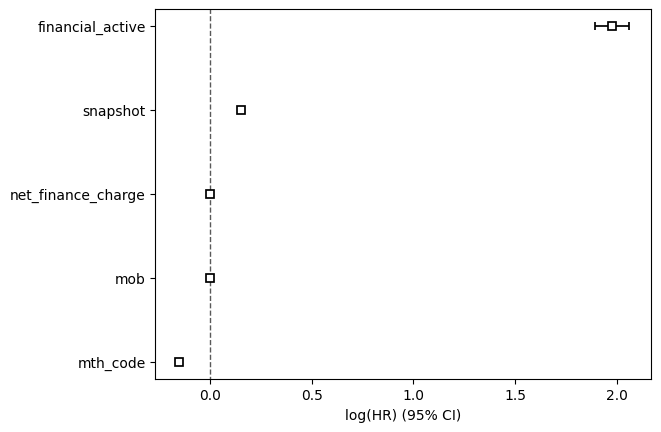

In [73]:
coxph.plot()

In [74]:
df_new = dfcox.loc[dfcox['charge_off'] == 1]
df_new_obs = df_new['time']
coxph.predict_survival_function(df_new, conditional_after = df_new_obs)

,337775,337776,337777,337778,337779,337780,337781,337782,337783,337784,...,5726228,5726229,5726230,5726231,5726232,5726233,5726234,5726235,5726236,5726237
0.0,1.000000e+00,1.000000,1.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
1.0,8.008235e-01,0.811470,0.791681,9.677923e-01,6.911697e-01,7.207339e-01,7.605806e-01,7.476095e-01,0.585225,6.936164e-01,...,8.095336e-01,8.172046e-01,8.238352e-01,8.099443e-01,8.074684e-01,8.265028e-01,8.821162e-01,8.280109e-01,8.495962e-01,8.276349e-01
2.0,6.109514e-01,0.612793,0.607401,9.294715e-01,4.121914e-01,4.725213e-01,5.382507e-01,5.082513e-01,0.297187,4.157012e-01,...,6.257902e-01,6.390210e-01,6.505800e-01,6.264947e-01,6.222542e-01,6.552624e-01,7.571027e-01,6.579178e-01,6.965713e-01,6.572553e-01
3.0,4.374860e-01,0.445632,0.430293,8.819351e-01,1.951886e-01,2.617194e-01,3.402245e-01,3.090415e-01,0.297187,1.982635e-01,...,4.554600e-01,4.717320e-01,4.861361e-01,4.563206e-01,4.511504e-01,4.920208e-01,6.269705e-01,4.953706e-01,5.451666e-01,4.945340e-01
4.0,2.834622e-01,0.294442,0.281649,8.253381e-01,5.577337e-02,1.113704e-01,1.883374e-01,1.540492e-01,0.297187,5.733499e-02,...,3.014118e-01,3.179860e-01,3.329105e-01,3.022807e-01,2.970735e-01,3.390752e-01,4.906998e-01,3.426018e-01,3.964838e-01,3.417200e-01
5.0,1.638265e-01,0.176903,0.158563,7.558168e-01,3.108532e-27,2.660420e-02,8.232457e-02,5.628589e-02,0.297187,5.573791e-27,...,1.789147e-01,1.931987e-01,2.063416e-01,1.796553e-01,1.752312e-01,2.118463e-01,3.600403e-01,2.150150e-01,2.651507e-01,2.142213e-01
6.0,7.915551e-02,0.088673,0.065557,6.747611e-01,1.732542e-52,3.630474e-31,2.487515e-02,1.041489e-02,0.297187,5.418531e-52,...,8.956294e-02,9.974705e-02,1.093896e-01,9.008316e-02,8.698831e-02,1.135031e-01,2.387569e-01,1.158907e-01,1.554799e-01,1.152913e-01
7.0,3.099028e-02,0.030666,0.017099,5.757135e-01,9.656334e-78,4.954234e-60,3.347835e-03,1.008079e-36,0.297187,5.267597e-77,...,3.670348e-02,4.253746e-02,4.826857e-02,3.699581e-02,3.526602e-02,5.077192e-02,1.405959e-01,5.224044e-02,7.813010e-02,5.187071e-02
8.0,8.342780e-03,0.006096,0.003124,4.576170e-01,5.381964e-103,6.760668e-89,1.237918e-43,9.757412e-71,0.297187,5.120866e-102,...,1.053293e-02,1.290662e-02,1.536174e-02,1.064868e-02,9.968830e-03,1.647002e-02,6.700903e-02,1.712991e-02,2.982626e-02,1.696310e-02
9.0,1.250597e-03,0.000790,0.003124,3.114737e-01,2.999641e-128,9.225773e-118,4.577408e-84,9.444405e-105,0.297187,4.978223e-127,...,1.731794e-03,2.300149e-03,2.933391e-03,1.758429e-03,1.603663e-03,3.233102e-03,2.294558e-02,3.415425e-03,7.409385e-03,3.369068e-03


In [75]:
coxph.check_assumptions(dfcox)

The ``p_value_threshold`` is set at 0.01. Even under the null hypothesis of no violations, some
covariates will be below the threshold by chance. This is compounded when there are many covariates.
Similarly, when there are lots of observations, even minor deviances from the proportional hazard
assumption will be flagged.

With that in mind, it's best to use a combination of statistical tests and visual tests to determine
the most serious violations. Produce visual plots using ``check_assumptions(..., show_plots=True)``
and looking for non-constant lines. See link [A] below for a full example.



<lifelines.StatisticalResult: proportional_hazard_test>
 null_distribution = chi squared
degrees_of_freedom = 1
             model = <lifelines.CoxPHFitter: fitted with 30409 total observations, 15262 right-censored observations>
         test_name = proportional_hazard_test

---
                         test_statistic      p  -log2(p)
financial_active   km             12.51 <0.005     11.27
                   rank            8.75 <0.005      8.34
mob                km              0.10   0.75      0.41
                   rank            0.02   0.90      0.15
mth_code           km              7.03   0.01      6.96
                   rank            6.86   0.01      6.83
net_finance_charge km             41.72 <0.005     33.15
                   rank           22.13 <0.005     18.58
snapshot           km              7.03   0.01      6.96
                   rank            8.50 <0.005      8.14



1. Variable 'net_finance_charge' failed the non-proportional test: p-value is <5e-05.

   Advice 1: the functional form of the variable 'net_finance_charge' might be incorrect. That is,
there may be non-linear terms missing. The proportional hazard test used is very sensitive to
incorrect functional forms. See documentation in link [D] below on how to specify a functional form.

   Advice 2: try binning the variable 'net_finance_charge' using pd.cut, and then specify it in
`strata=['net_finance_charge', ...]` in the call in `.fit`. See documentation in link [B] below.

   Advice 3: try adding an interaction term with your time variable. See documentation in link [C]
below.


2. Variable 'financial_active' failed the non-proportional test: p-value is 0.0004.

   Advice: with so few unique values (only 2), you can include `strata=['financial_active', ...]` in
the call in `.fit`. See documentation in link [E] below.

3. Variable 'mth_code' failed the non-proportional test: p-value is 0.

[]

In [107]:
df_clean.reset_index()
s = df_clean[df_clean["charge_off"] == 1].head(10)

In [108]:
def findCol(col):
    count = 0
    for column in s.columns:
        if (column == col):
            return count
        count += 1

In [109]:
randoms = [1, 3, 4, 5, 7]
rows2 = s.iloc[randoms, [findCol("net_finance_charge"), findCol("financial_active"), findCol("mob"), findCol("snapshot"), findCol("mth_code")]]
#selecting columns from an already small sample
rows2

,net_finance_charge,financial_active,mob,snapshot,mth_code
337776,0.00,1.0,13,201801,201903
337778,0.00,0.0,2,201801,201803
337779,0.00,1.0,20,201801,201808
337780,0.00,1.0,27,201801,201807
337782,64.29,1.0,5,201801,201806


<AxesSubplot: >

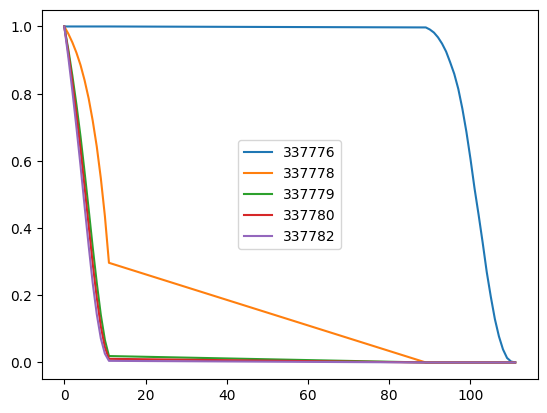

In [110]:
coxph.predict_survival_function(rows2).plot()